# 2. For the same dataset (2 classes, male and female)

a) Use LDA to reduce the dimension from d to d’. (Here d=128)

b) Choose the direction W to reduce the dimension d’ (select appropriate d’).

c) Use d’ features to classify the test cases (any classification algorithm will do, Bayes
classifier, minimum distance classifier, and so on).

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
df=pd.read_csv('gender_feature_vectors.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,797,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,798,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,799,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [4]:
df['Unnamed: 1'].value_counts()

female    401
male      399
Name: Unnamed: 1, dtype: int64

In [5]:
df.drop(columns=df.columns[0],inplace=True)
df

,Unnamed: 1,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [6]:
df.rename(columns={df.columns[0]:"Class"},inplace=True)
df

,Class,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [171]:
df_test=df.iloc[np.r_[390:400, 790:800]]

In [170]:
df_train=df.iloc[np.r_[0:390,400:790]]

## Computing mean and scatter matrix

In [9]:
df_male=df_train[[i for i in df.columns[1:]]][:390]
df_male

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,-0.056267,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,-0.011889,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-0.064409,0.111391,0.204528,-0.061478,-0.007144,-0.185951,0.037198,-0.122494,0.166727,-0.069979,...,0.042364,-0.021660,-0.007661,-0.074625,-0.075601,-0.067688,0.089499,-0.015752,0.020578,0.019863
386,0.002976,0.060769,-0.016651,0.053049,-0.099903,-0.082844,0.017824,-0.106804,0.121373,-0.044477,...,0.087624,0.082917,0.005136,0.048027,-0.133601,-0.171987,-0.024582,0.048323,0.034540,0.045522
387,-0.009311,0.077162,0.031294,-0.089573,-0.038689,-0.031663,-0.012356,-0.064096,0.171178,-0.048247,...,0.061965,0.020552,0.003048,0.049886,-0.127327,-0.114139,0.017611,0.062137,-0.021274,0.087335
388,-0.036479,0.063089,0.037658,-0.000695,-0.104741,-0.018407,0.030498,-0.089321,0.131632,-0.069340,...,0.019669,-0.004390,0.016825,-0.022278,-0.104701,-0.133424,-0.009713,0.073659,-0.059742,0.018406


In [10]:
df_female=df_train[[i for i in df.columns[1:]]][390:]
df_female

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
400,0.001747,0.185678,0.073260,0.042142,-0.088674,0.028186,-0.027830,-0.064211,0.097413,-0.010493,...,0.123615,0.030036,0.041442,-0.012818,-0.119177,-0.165786,-0.075368,-0.017690,0.067028,0.036452
401,-0.091598,0.095340,0.072125,-0.092276,-0.079953,0.047782,-0.004701,-0.092005,0.222913,-0.059830,...,0.011370,0.144719,0.089139,-0.059767,-0.111235,-0.055420,0.006283,0.016900,-0.081676,0.022809
402,-0.018751,0.088572,0.068894,-0.065700,-0.115126,0.024339,-0.028420,-0.159320,0.164595,-0.116339,...,0.010345,0.095309,0.012255,-0.033010,-0.097720,-0.218889,0.077764,0.045943,0.010856,0.100522
403,-0.130889,0.093262,0.122244,-0.110014,-0.157625,-0.036781,0.073908,-0.098571,0.120419,-0.016198,...,0.003229,0.049330,0.059733,-0.023820,-0.098432,-0.034316,0.075131,-0.029204,-0.020707,0.031028
404,-0.037433,0.078158,0.118061,-0.117658,-0.194807,-0.045464,-0.014104,-0.158824,0.159272,-0.112154,...,0.043848,-0.009760,0.043486,0.020251,-0.115420,-0.040023,0.099409,-0.032240,0.037601,-0.020016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,-0.017931,0.045591,0.059826,-0.059833,-0.126832,0.070365,0.026347,-0.093537,0.278268,-0.124208,...,-0.007122,0.054781,0.042244,-0.074819,-0.143953,-0.088869,0.005722,-0.023399,-0.065643,0.070971
786,-0.039572,0.049409,0.100950,-0.092940,-0.152356,-0.057714,-0.000538,-0.115991,0.206082,-0.050062,...,0.004484,0.114056,-0.050633,-0.022527,-0.123464,-0.087283,0.087269,-0.020627,-0.023931,0.079812
787,-0.015170,-0.001116,0.132143,-0.078673,-0.134462,-0.155683,-0.030665,-0.164758,0.105174,-0.100062,...,-0.020632,0.083426,-0.001711,-0.094793,-0.059944,-0.038360,-0.003003,-0.004797,-0.030830,0.047556
788,-0.151263,0.096725,0.075206,-0.047269,-0.233372,-0.019918,-0.072370,-0.118408,0.193336,-0.035399,...,0.015628,0.055113,-0.030315,-0.020312,-0.073715,-0.009520,-0.020806,-0.062609,-0.123534,-0.001360


In [45]:
mean_male=df_male.mean()
mean_male

0     -0.091137
1      0.092309
2      0.043384
3     -0.030786
4     -0.093000
         ...   
123   -0.118805
124    0.021776
125   -0.025222
126    0.020244
127    0.040089
Length: 128, dtype: float64

In [40]:
mean_female=df_female.mean()
mean_female

0     -0.116036
1      0.076929
2      0.081975
3     -0.077089
4     -0.122499
         ...   
123   -0.086894
124    0.053799
125   -0.031701
126    0.004233
127    0.025536
Length: 128, dtype: float64

### Sw matrix (within class)

In [115]:
#Scatter matrix 1

S1= (df_male.values - np.array(mean_male) ).T @ (df_male.values - np.array(mean_male))

In [116]:
S1

array([[ 1.21590589, -0.22385172, -0.12872454, ...,  0.24384893,
        -0.07807342, -0.03553427],
       [-0.22385172,  0.89023903,  0.14525314, ..., -0.14402007,
        -0.11400393, -0.08026288],
       [-0.12872454,  0.14525314,  0.98592786, ..., -0.1457067 ,
         0.0365962 , -0.02872259],
       ...,
       [ 0.24384893, -0.14402007, -0.1457067 , ...,  0.951065  ,
         0.02352049,  0.00168977],
       [-0.07807342, -0.11400393,  0.0365962 , ...,  0.02352049,
         0.97078087,  0.10619016],
       [-0.03553427, -0.08026288, -0.02872259, ...,  0.00168977,
         0.10619016,  0.68554017]])

In [117]:
S2 = (df_female.values - np.array(mean_female)).T @ (df_female.values - np.array(mean_female))

In [120]:
S2

array([[ 0.9621001 , -0.13917361,  0.14762725, ...,  0.06294964,
        -0.08545036, -0.05254243],
       [-0.13917361,  1.01438579,  0.01902008, ..., -0.17504062,
        -0.04697787,  0.01789532],
       [ 0.14762725,  0.01902008,  0.75556753, ..., -0.05615372,
        -0.07224368,  0.15315488],
       ...,
       [ 0.06294964, -0.17504062, -0.05615372, ...,  0.88627125,
        -0.04231172,  0.11945256],
       [-0.08545036, -0.04697787, -0.07224368, ..., -0.04231172,
         0.92043746, -0.1086309 ],
       [-0.05254243,  0.01789532,  0.15315488, ...,  0.11945256,
        -0.1086309 ,  1.0380166 ]])

In [121]:
Sw=S1+S2

### For Sb (between class) we need mean of whole data

In [122]:
mean_whole=np.mean(df_train)

In [123]:
def Sb_i(mean_whole,mean_class,number_of_points,dim):
    return (number_of_points * np.subtract(mean_class,mean_whole).values.reshape(dim,1) @ np.subtract(mean_class,mean_whole).values.reshape(1,dim))

In [124]:
Sb1=Sb_i(mean_whole,mean_male,390,128)

In [125]:
Sb2=Sb_i(mean_whole,mean_female,390,128)

In [126]:
Sb=Sb1+Sb2

In [160]:
eigen_vectors, eigen_values,_=np.linalg.svd(np.linalg.inv(Sw) @ Sb)

In [161]:
eigen_values

array([2.86331575e+06, 4.23622724e-04, 3.92174671e-04, 3.80205066e-04,
       3.36801586e-04, 3.13679760e-04, 3.00592531e-04, 2.93487822e-04,
       2.82043079e-04, 2.68530778e-04, 2.55938619e-04, 2.45584401e-04,
       2.41263656e-04, 2.25067465e-04, 2.19936123e-04, 2.13424105e-04,
       2.07381872e-04, 2.00355749e-04, 1.92392180e-04, 1.88160141e-04,
       1.83027655e-04, 1.77066960e-04, 1.71562645e-04, 1.69696027e-04,
       1.62975460e-04, 1.59769177e-04, 1.51195448e-04, 1.47240835e-04,
       1.43586253e-04, 1.41992273e-04, 1.37955318e-04, 1.36252071e-04,
       1.33589932e-04, 1.28943688e-04, 1.25820298e-04, 1.19925455e-04,
       1.16461762e-04, 1.11768409e-04, 1.10177771e-04, 1.09349500e-04,
       1.06749047e-04, 1.05223012e-04, 1.02222334e-04, 1.01941834e-04,
       9.44546047e-05, 9.23560722e-05, 8.88606569e-05, 8.76879324e-05,
       8.48966162e-05, 8.21241978e-05, 8.14298128e-05, 7.84806287e-05,
       7.71131990e-05, 7.62091603e-05, 7.40316263e-05, 7.21218374e-05,
      

In [131]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Eigen values')

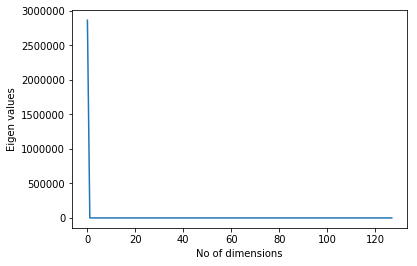

In [162]:
plt.plot(eigen_values)
plt.xlabel("No of dimensions")
plt.ylabel("Eigen values")

We take only first eigen value (2 classes --> take (2-1) eigen value).

## Reducing data

In [174]:
red_train_data=df_train[df.columns[1:]] @ eigen_vectors[0]
red_train_data

0      0.090795
1      0.104738
2      0.110156
3      0.040801
4      0.109065
         ...   
785    0.056475
786    0.124146
787    0.089953
788    0.187711
789    0.197465
Length: 780, dtype: float64

In [176]:
red_test_data=df_test[[i for i in df_test.columns[1:]]] @ eigen_vectors[0]
red_test_data

390    0.188961
391    0.057210
392    0.103204
393    0.140874
394    0.136971
395    0.132510
396    0.186823
397    0.204170
398    0.111931
399    0.180366
790    0.204684
791    0.171431
792    0.143133
793    0.074409
794    0.139750
795    0.201316
796    0.121479
797    0.239236
798    0.186254
799    0.156115
dtype: float64

## Classification

In [201]:
def dist(x=None, data=None, cov=None):
    x_minus_mu = np.absolute(x - np.mean(data))
    return np.array(x_minus_mu)

In [202]:
male_dist=dist(red_test_data,red_train_data[:390])

female_dist=dist(red_test_data,red_train_data[390:])

In [203]:
def predictions(list1,list2,class1="C1",class2="C2"):
    pred_list=[]
    for i in range(len(list1)):
        if list1[i] > list2[i]:
            pred_list.append(class2)
        else:
            pred_list.append(class1)
    return pred_list

In [204]:
male_dist

array([0.05780823, 0.07394259, 0.02794873, 0.00972123, 0.00581867,
       0.00135708, 0.05567038, 0.07301765, 0.0192216 , 0.0492137 ,
       0.07353165, 0.04027799, 0.01198004, 0.05674363, 0.00859759,
       0.07016323, 0.00967405, 0.10808361, 0.05510097, 0.02496267])

In [205]:
female_dist

array([0.04882803, 0.08292279, 0.03692894, 0.00074103, 0.00316153,
       0.00762313, 0.04669018, 0.06403745, 0.0282018 , 0.04023349,
       0.06455145, 0.03129779, 0.00299984, 0.06572383, 0.00038261,
       0.06118303, 0.01865425, 0.09910341, 0.04612077, 0.01598247])

In [206]:
pred=predictions(male_dist,female_dist,"male","female")

In [207]:
## Verifying the results

def accuracy(pred,true_class):
    true=0
    total=len(pred)
    for i in range(total):
        if pred[i] == true_class[i]:
            true+=1
    
    return true/total

accuracy(pred,df_test["Class"].to_list())

0.65

In [209]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
neigh=KNeighborsClassifier()

In [215]:
neigh.fit(np.array(red_train_data).reshape(-1,1),df_train['Class'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [217]:
pred1=neigh.predict(np.array(red_test_data).reshape(-1,1))

In [218]:
accuracy(pred1,df_test["Class"].to_list())

0.65

# 3 Give the comparative study for the above results w.r.t to classification accuracy in terms of the confusion matrix.



In [222]:
from sklearn.metrics import confusion_matrix

In [223]:
confusion_matrix(df_test["Class"].to_list(), pred1, labels=["male", "female"])

array([[5, 4],
       [3, 8]], dtype=int64)

In [225]:
pred_pca=['male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female']

In [226]:
confusion_matrix(df_test["Class"].to_list(), pred_pca, labels=["male", "female"])

array([[ 9,  0],
       [ 1, 10]], dtype=int64)

Both distance based classifier and K-NN gives 65 percent accuracy for LDA.Whereas for PCA we get 95 percent accuracy.
We can see that PCA outperforms LDA in classification.

From the confusion matrix we see PCA based classifier only misclassifies one sample. 
LDA based classifier misclassifies 7 samples out of 20

In [221]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(neigh,np.array(red_test_data).reshape(-1,1) , df_test["Class"].to_list(),
                                 display_labels=["male","female"],
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

ImportError: cannot import name 'ConfusionMatrixDisplay' from 'sklearn.metrics' (C:\Users\RITHIC\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)